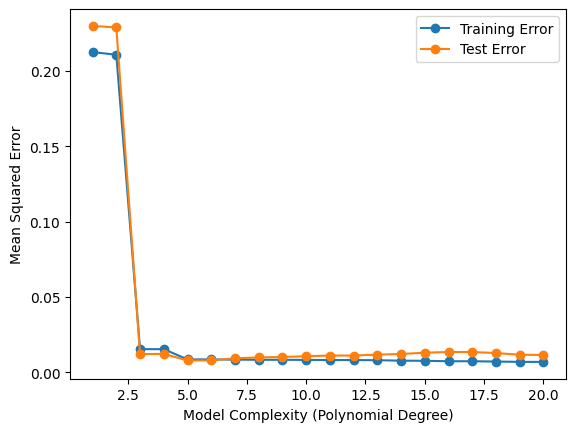

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X = np.linspace(0, 1, 100).reshape(-1, 1)
y = np.sin(2 * np.pi * X).ravel() + np.random.normal(scale=0.1, size=X.shape[0])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Function to plot the training and test errors
def plot_errors(degrees):
    training_errors = []
    test_errors = []
    
    for degree in degrees:
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)
        
        training_errors.append(mean_squared_error(y_train, y_train_pred))
        test_errors.append(mean_squared_error(y_test, y_test_pred))
    
    plt.plot(degrees, training_errors, label='Training Error', marker='o')
    plt.plot(degrees, test_errors, label='Test Error', marker='o')
    plt.xlabel('Model Complexity (Polynomial Degree)')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

# Define a range of polynomial degrees to test
degrees = np.arange(1, 21)
plot_errors(degrees)
